<a href="https://colab.research.google.com/github/bahing-rai/AI-Coursework/blob/main/AI_Coursework.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Importing Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import (
    confusion_matrix,
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    ConfusionMatrixDisplay
)

#Loading and Preparing the Data

In [2]:
df = pd.read_csv("muse_v3.csv")

# Dropping missing values in key emotional features

In [3]:
df = df.dropna(subset=["valence_tags", "arousal_tags", "dominance_tags"])

# Binary classification: is the song mood positive (valence >= 5)?


In [4]:
df["is_positive"] = df["valence_tags"].apply(lambda x: 1 if x >= 5 else 0)


# Features and target

In [5]:
X = df[["valence_tags", "arousal_tags", "dominance_tags"]]
y = df["is_positive"]

#Split Data + Standardize

In [6]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#Hyperparameter Tuning (GridSearchCV)

In [7]:
param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11],
    'weights': ['uniform', 'distance'],
    'p': [1, 2]  # Manhattan and Euclidean
}

grid = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5, scoring='accuracy')
grid.fit(X_train_scaled, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [3, 5, 7, 9, 11], 'p': [1, 2],
                         'weights': ['uniform', 'distance']},
             scoring='accuracy')

# Best model and parameters

In [8]:
best_knn = grid.best_estimator_
print("✅ Best KNN Parameters:", grid.best_params_)
print("✅ Best Cross-Validated Accuracy:", grid.best_score_)


✅ Best KNN Parameters: {'n_neighbors': 11, 'p': 1, 'weights': 'distance'}
✅ Best Cross-Validated Accuracy: 0.9921146953405019


#Evaluation on Test Set

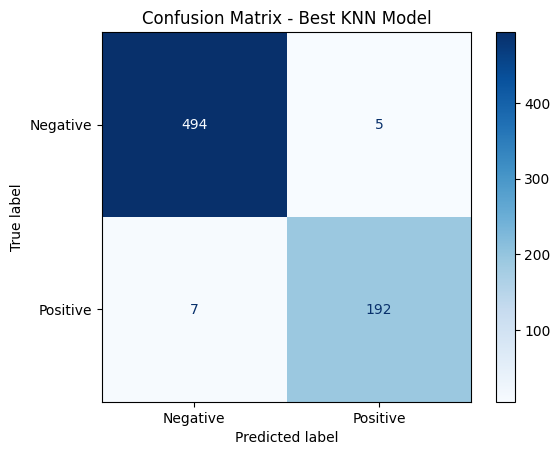

In [9]:
y_pred = best_knn.predict(X_test_scaled)

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Negative", "Positive"])
disp.plot(cmap="Blues")
plt.title("Confusion Matrix - Best KNN Model")
plt.show()